## Importing libraries and mounting drive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.cluster import KMeans
import seaborn as sns
sns.set_theme()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading data

In [3]:
features = np.load('/content/drive/MyDrive/Data/50_shares/AE_features_djones.npy')
time_series = pd.read_csv('/content/drive/MyDrive/Data/ProcessedData/US/Processed_TimeSeries_dowjones.csv',index_col=[0])
volume = pd.read_csv('/content/drive/MyDrive/Data/ProcessedData/US/dow_jones_volume[:300].csv',index_col=[0])

## first method

### Import clustring libraries

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram,cut_tree
import sys
from sklearn.cluster import MiniBatchKMeans
!pip install minisom
from minisom import MiniSom
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=3a9d3f6d722a15ac5e8c3839b897287d4add9783542e422e697217a2e67bd284
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


### Hierarchical clustering

Hierarchical clustering is a method of clustering data points into groups based on their similarity. The process involves iteratively merging the most similar clusters until all data points belong to a single cluster. The result is a dendrogram, which is a tree-like diagram that shows the hierarchical relationships between the clusters.

The linkage function in the scipy.cluster.hierarchy module is used to perform hierarchical clustering. It takes a matrix of pairwise distances between the data points as input and returns a linkage matrix that encodes the hierarchical structure of the clusters.

The linkage matrix is a (n-1) x 4 matrix, where n is the number of data points. Each row of the matrix represents a merge operation between two clusters. The first two columns of the row contain the indices of the clusters being merged, while the third column contains the distance between the clusters. The fourth column contains the number of data points in the merged cluster.

The linkage function can be expressed mathematically as:

$$Z = \text{linkage}(D, method)$$

where $D$ is the matrix of pairwise distances between the data points, and $method$ is the linkage method used to compute the distances between clusters. The available linkage methods are:

- single: uses the minimum distance between any two points in the clusters
- complete: uses the maximum distance between any two points in the clusters
- average: uses the average distance between all pairs of points in the clusters
- ward: uses the increase in variance when merging the clusters

For example, to perform hierarchical clustering using the complete linkage method, we can use the following code:

from scipy.cluster.hierarchy import linkage

Z = linkage(D, method='complete')


This will return the linkage matrix $Z$ that encodes the hierarchical structure of the clusters.

In [ ]:
def hierarcial(features,n):
  #  hierarchical clustering
  Z = linkage(features, method='complete')
  # plt.figure(figsize=(25,13))
  # Generate dendrogram
  # dendrogram(Z,labels=EN_labels)
  # Display the plot
  # plt.show();
  labels = cut_tree(Z, n_clusters=n)
  return labels.reshape(-1)

### Agglomerative clustering

Agglomerative clustering is a hierarchical clustering algorithm that starts with each data point as its own cluster and then iteratively merges the closest pairs of clusters until a stopping criterion is met. The distance between clusters is typically measured using a linkage criterion, such as Ward, complete, or average linkage.

In scikit-learn, the AgglomerativeClustering class can be used to perform agglomerative clustering. The class takes several parameters, including the number of clusters to form, the linkage criterion to use, and the distance metric to use.

The agglomerative clustering algorithm can be mathematically expressed as follows:

Let X be the dataset with n data points, and let d(i,j) be the distance between data points i and j. Initially, each data point is its own cluster:

C_i = {i} for i = 1, 2, ..., n

At each iteration, the two closest clusters are merged into a new cluster:

C_k = C_i ∪ C_j

where i and j are the indices of the two closest clusters, and k is the index of the new cluster. The distance between clusters is calculated using a linkage criterion, such as Ward, complete, or average linkage.

The algorithm stops when a stopping criterion is met, such as a maximum number of clusters or a minimum distance between clusters.

The agglomerative clustering algorithm can be implemented in scikit-learn as follows:

from sklearn.cluster import AgglomerativeClustering

 create an instance of the AgglomerativeClustering class
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')

 fit the model to the data
agg_clustering.fit(X)


In the above code, n_clusters specifies the number of clusters to form, linkage specifies the linkage criterion to use, and affinity specifies the distance metric to use. The fit method is used to fit the model to the data.

In [ ]:
def Agglomerative(features,n):
  # Perform agglomerative clustering
  clustering = AgglomerativeClustering(n_clusters=n, affinity='precomputed', linkage='complete')
  labels = clustering.fit_predict(features)
  return labels

### Optics

In [ ]:
def optics_(features,n):
  optics = OPTICS(min_samples=0.001,p=2)
  optics.fit(features)
  labels = optics.labels_
  labels = labels+1
  return labels

### kmeans

In [ ]:
def kmeans(features,n):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(features)
    # Get the cluster labels for each node
    return kmeans.labels_

### Meanshift

In [ ]:
def meanshift(features,n):
    # Perform Mean Shift clustering
    meanshift = MeanShift(max_iter=300)
    clusters = meanshift.fit_predict(features)
    return clusters

### Spectral

In [ ]:
def spec(features,n):
    spectral_clustering = SpectralClustering(n_clusters=n, affinity='precomputed')
    clusters = spectral_clustering.fit_predict(features)
    return clusters

### Affinity_Propagation

In [ ]:
def Affinity_Propagation(features,damp=0.6):
    # Perform clustering using Affinity Propagation
    aff_prop = AffinityPropagation(damping=damp,affinity='precomputed')
    clusters = aff_prop.fit_predict(features)
    # Get the cluster centers
    cluster_centers = aff_prop.cluster_centers_indices_
    return cluster_centers


### Birch

In [ ]:
def Birch_clustering(features,n):
    birch = Birch(n_clusters=n)  # Set n_clusters to None for automatic determination of the number of clusters
    # Fit the adjacency matrix to the Birch clustering model
    clusters = birch.fit_predict(features)
    return clusters


### GaussianMixture

In [ ]:
def GM(features,n):
    gmm = GaussianMixture(n_components=7)  # Set the number of components (clusters) to 3
    # Reshape the adjacency matrix to fit the GMM input requirements
    X = features#.reshape(-1, 1)
    # Fit the adjacency matrix to the GMM clustering model
    gmm.fit(X)
    # Predict the cluster labels for each node
    clusters = gmm.predict(X)
    clusters = clusters[0:50]
    return clusters

### Ward

In [ ]:
def ward_clustering(features,n):
    # Perform hierarchical clustering using Ward's Method
    Z = linkage(features, method='ward')
    return cut_tree(Z, n_clusters=n).reshape(-1)

### SOM

In [ ]:
def SOM_clusterin(features,n):
    # Define SOM parameters
    map_size = (5, 5)  # Adjust the map size according to your preference
    input_len = features.shape[1]  # Number of features for each node
    sigma = 1  # Initial neighborhood radius
    learning_rate = 0.2  # Initial learning rate
    # Initialize and train the SOM
    som = MiniSom(map_size[0], map_size[1], input_len, sigma=sigma, learning_rate=learning_rate)
    som.random_weights_init(features)
    som.train_random(features, num_iteration=200)  # Adjust the number of iterations as needed
    # Get cluster labels for each node
    cluster_labels = som.labels_map(data=features,labels=list(range(50)))
    # Print cluster labels
    labelss = [0 for _ in range(50)]

    for index,(i,j) in enumerate( cluster_labels.items()):
        for k in list(j.keys()):
            labelss[k] = index
        # break
    return np.array(labelss)

### Mini Batch KMeans

In [ ]:
def mini_KMeans(features ,n):
    batch_size = 10  # Number of samples per batch
    max_iter = 400  # Maximum number of iterations

    mini_batch_kmeans = MiniBatchKMeans(n_clusters=n, batch_size=batch_size, max_iter=max_iter)
    cluster_labels = mini_batch_kmeans.fit_predict(features)

    return cluster_labels

### test

In [ ]:
hierarcial(features,7)

array([0, 0, 1, 2, 2, 2, 3, 4, 2, 0, 2, 2, 0, 2, 2, 2, 5, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 4, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 6, 2, 2,
       2, 1, 2, 2, 2, 2])

In [ ]:
Agglomerative(features,7)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


ValueError: ignored

In [ ]:
optics_(features,7)

array([1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 3,
       0, 0, 0, 0, 0, 0])

In [ ]:
kmeans(features,7)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 5, 0, 0, 0, 3, 6, 0, 1, 0, 6, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 6, 0, 0, 4, 1, 4, 1, 0, 6, 5, 0, 1, 0, 0,
       0, 5, 0, 0, 6, 0], dtype=int32)

In [ ]:
meanshift(features,7)

array([0, 0, 2, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 6, 0, 6, 0, 0, 0, 3, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 0])

In [ ]:
spec(features,7)

ValueError: ignored

In [ ]:
Affinity_Propagation(features)

ValueError: ignored

In [ ]:
Birch_clustering(features,7)

array([1, 0, 3, 1, 1, 2, 5, 6, 1, 0, 1, 1, 0, 1, 2, 2, 4, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 6, 1, 1, 2, 1, 2, 0, 2, 1, 3, 2, 0, 1, 2,
       1, 3, 2, 1, 1, 2])

In [ ]:
GM(features,7)

array([0, 0, 1, 6, 6, 5, 1, 2, 6, 0, 6, 2, 0, 6, 3, 5, 6, 6, 5, 6, 5, 0,
       6, 6, 0, 6, 6, 6, 6, 3, 2, 6, 4, 3, 0, 3, 0, 5, 6, 1, 5, 0, 6, 5,
       6, 1, 5, 6, 2, 5])

In [ ]:
ward_clustering(features,7)

array([0, 1, 2, 0, 0, 3, 4, 5, 0, 1, 0, 0, 1, 0, 3, 3, 6, 3, 3, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 3, 3, 5, 0, 0, 3, 0, 3, 1, 3, 0, 2, 3, 1, 0, 3,
       0, 2, 3, 0, 0, 3])

In [ ]:
SOM_clusterin(features,7)

array([ 0,  1,  2,  3,  3,  4,  5,  6,  7,  1,  8,  6,  5,  9, 10, 11, 12,
       13, 14,  9, 11,  0, 15, 11,  0, 16,  3, 17, 18, 17,  6,  3,  9, 10,
        0, 19,  5, 20,  7, 21, 10,  1,  7, 20,  9,  2, 22,  9,  3, 22])

In [ ]:
mini_KMeans(features,7)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 5, 2, 1, 1, 6, 4, 1, 1, 5, 1, 1, 5, 1, 0, 6, 3, 6, 6, 1, 6, 5,
       1, 6, 5, 1, 5, 1, 0, 0, 1, 1, 0, 0, 5, 0, 5, 6, 1, 2, 6, 5, 1, 6,
       1, 2, 6, 1, 1, 6], dtype=int32)

### Votting

In [ ]:
def chunk_to_clusters(arr):
    num_cluster = max(arr) + 1
    clusters = []
    for i in range(num_cluster):
        a = np.where(arr == i)[0]
        clusters.append(list(a))

    return clusters
# convert adjacency(similarity) matrix to distance matrix
def adj_to_distance(adj_mat):
    dist_mat = np.exp(-adj_mat)
    np.fill_diagonal(dist_mat,0)
    return dist_mat


# convert distance matrix to adjacency(similarity) matrix
def distance_to_adj(dist_mat):
    adj_mat = np.exp(-dist_mat)
    np.fill_diagonal(adj_mat,1)
    return adj_mat

In [ ]:
def convert_arr_to_cluster(arr):
    cls= []
    n_cluster = max(arr+1)
    for i in range(n_cluster):
        cls.append(list(np.where(arr == i)[0]))
    return cls

In [ ]:
def create_clusters(features,n):
    all_clustering = []
    all_clustering.append(chunk_to_clusters(hierarcial(features,n)))
    all_clustering.append(chunk_to_clusters(optics_(features,n)))
    all_clustering.append(chunk_to_clusters(kmeans(features,n)))
    all_clustering.append(chunk_to_clusters(meanshift(features,n)))
    all_clustering.append(chunk_to_clusters(Birch_clustering(features,n)))
    all_clustering.append(chunk_to_clusters(ward_clustering(features,n)))
    all_clustering.append(chunk_to_clusters(SOM_clusterin(features,n)))
    all_clustering.append(chunk_to_clusters(mini_KMeans(features,n)))

    return all_clustering


In [ ]:
def votter(clusters_list,num_node):
    my_dict = {}
    for pair in create_permutations(list(range(num_node))):
        pair = tuple(pair)
        counter = 0
        for clusters in clusters_list:
            is_neighbor = False
            for cluster in clusters:
                if (pair[0] in cluster) and  (pair[1] in cluster):
                    is_neighbor = True
            if is_neighbor:
                counter += 1
        my_dict[pair] = counter

    return my_dict

In [ ]:
def regenerate_adj_matrix(dist_mat,n):
    my_dict = votter(create_clusters(dist_mat,n),50)
    adj_mat = np.zeros((50,50))
    for pair,count in my_dict.items():
        adj_mat[pair[0],pair[1]] = adj_mat[pair[1],pair[0]] = count
        # adj_mat = adj_mat#/adj_mat.max()
        np.fill_diagonal(adj_mat,adj_mat.max())
    return adj_mat


In [ ]:
from re import X
from itertools import permutations

def create_permutations(lst):
    # Generate permutations of length 2
    perm = permutations(lst, 2)

    # Print each permutation, excluding duplicates
    x = []
    for p in perm:
        if set(p) not in x:
          x.append(set(p))
        #   print(p)
    return x

In [ ]:
adj = regenerate_adj_matrix(features,7)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
dist = adj_to_distance(adj)
dist

array([[0.        , 0.00673795, 1.        , ..., 0.04978707, 0.01831564,
        0.36787944],
       [0.00673795, 0.        , 0.36787944, ..., 0.13533528, 0.04978707,
        0.13533528],
       [1.        , 0.36787944, 0.        , ..., 0.36787944, 0.36787944,
        0.36787944],
       ...,
       [0.04978707, 0.13533528, 0.36787944, ..., 0.        , 0.00247875,
        0.04978707],
       [0.01831564, 0.04978707, 0.36787944, ..., 0.00247875, 0.        ,
        0.04978707],
       [0.36787944, 0.13533528, 0.36787944, ..., 0.04978707, 0.04978707,
        0.        ]])

In [ ]:
final = convert_arr_to_cluster(kmeans(dist,7))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_clusters(clusters,labels,dataset):
    for index,cluster in enumerate(clusters):
        names = []
        plt.figure(figsize=(18,3))
        plt.title(f'Cluster {index+1}')
        for stock in cluster:
            plt.plot(dataset[labels[stock]]/dataset[labels[stock]].mean());
            names.append(labels[stock])
        plt.ylabel('Normalaized Close Price')
        plt.xlabel('day')
        plt.legend(names)


In [ ]:
final

[[2, 6, 16, 39, 41, 45],
 [3, 4, 8, 10, 11, 13, 19, 21, 22, 25, 26, 31, 32, 38, 42, 44, 47, 48],
 [0, 7, 24, 30, 34],
 [15, 20, 37, 40, 43],
 [33, 35],
 [1, 9, 12, 36],
 [5, 14, 17, 18, 23, 27, 28, 29, 46, 49]]

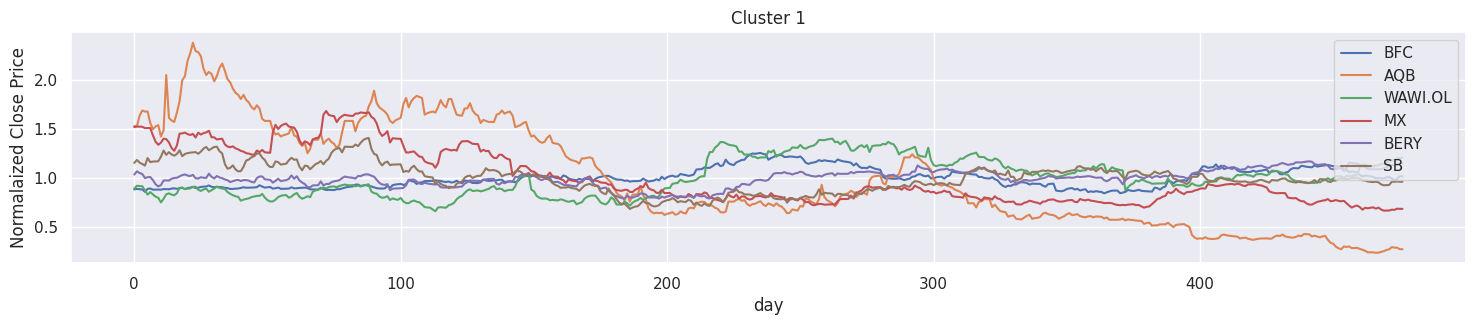

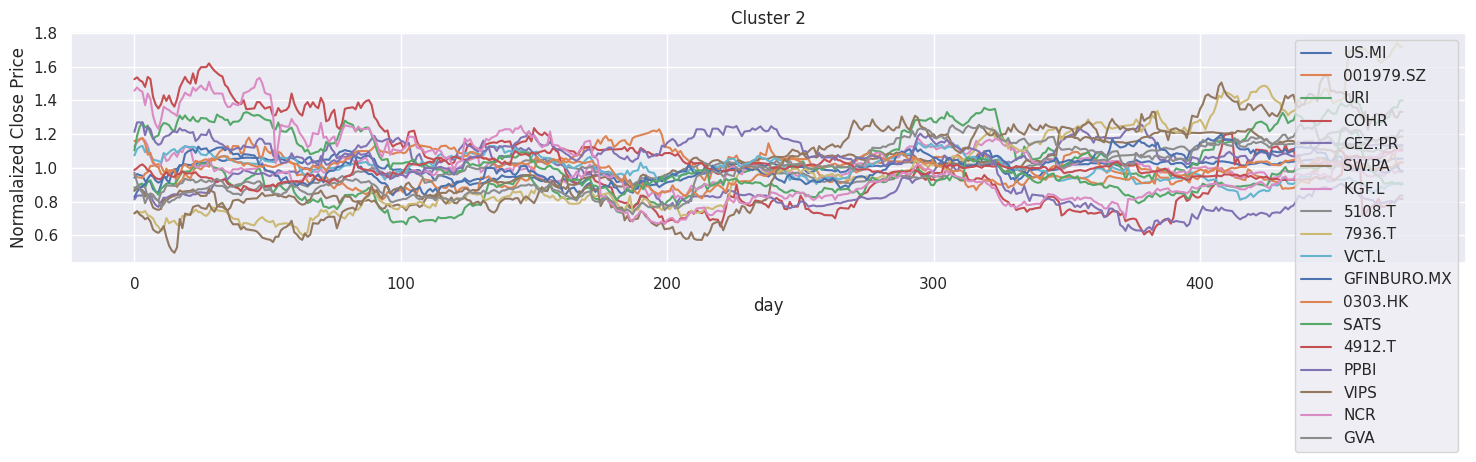

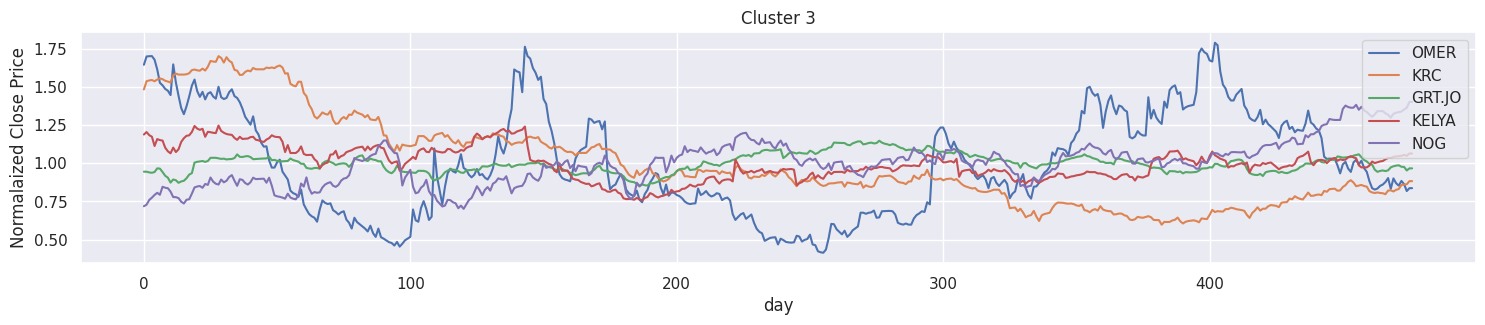

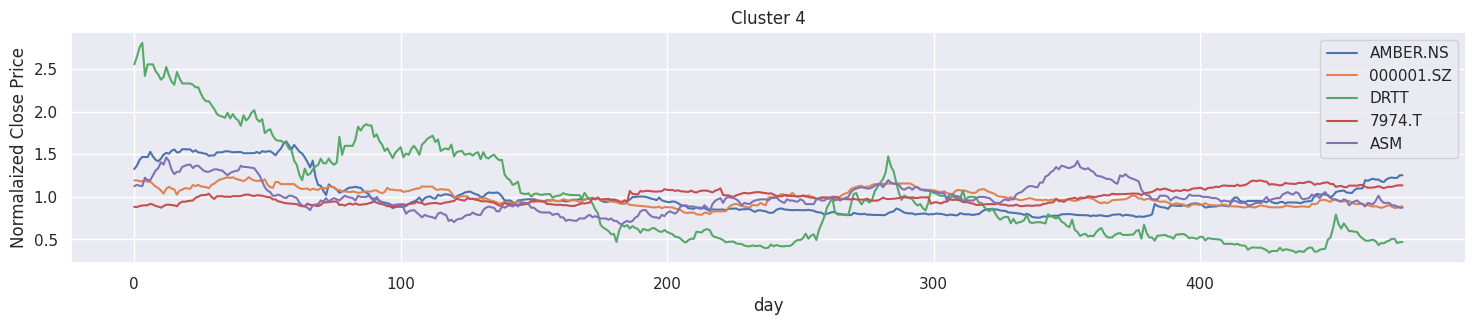

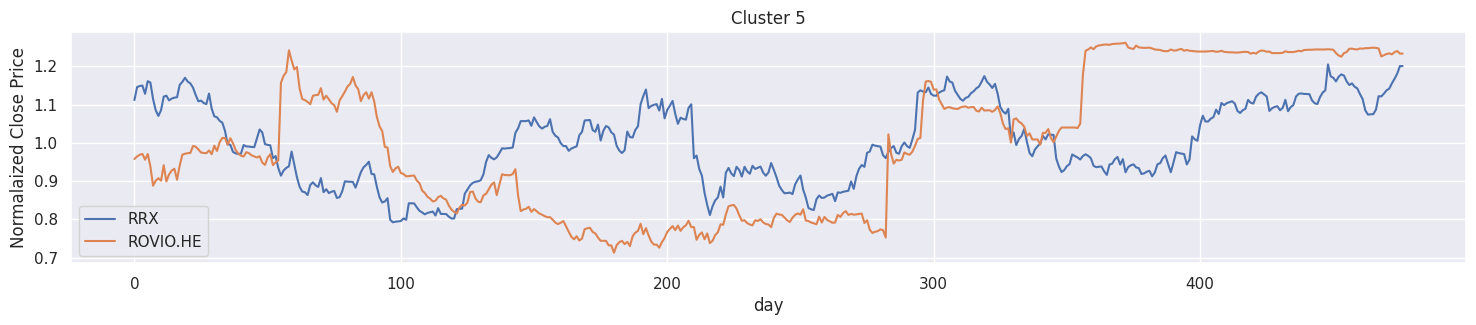

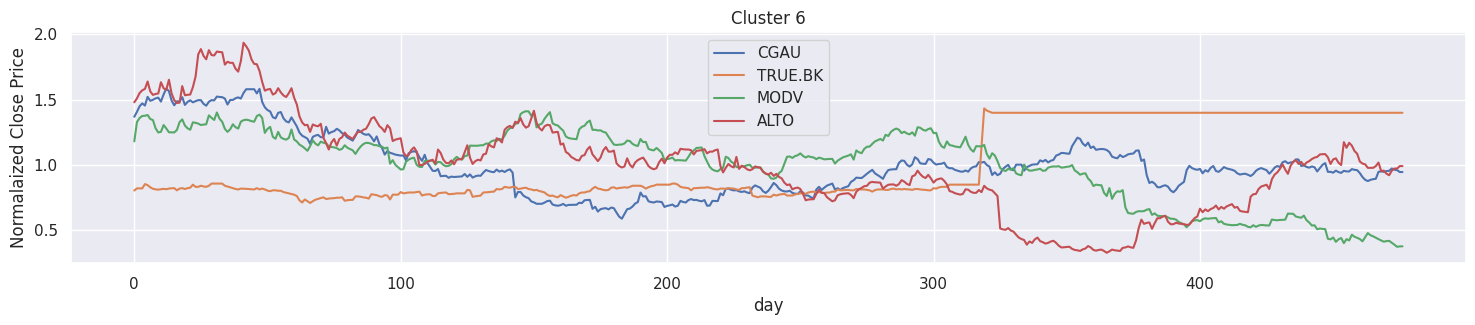

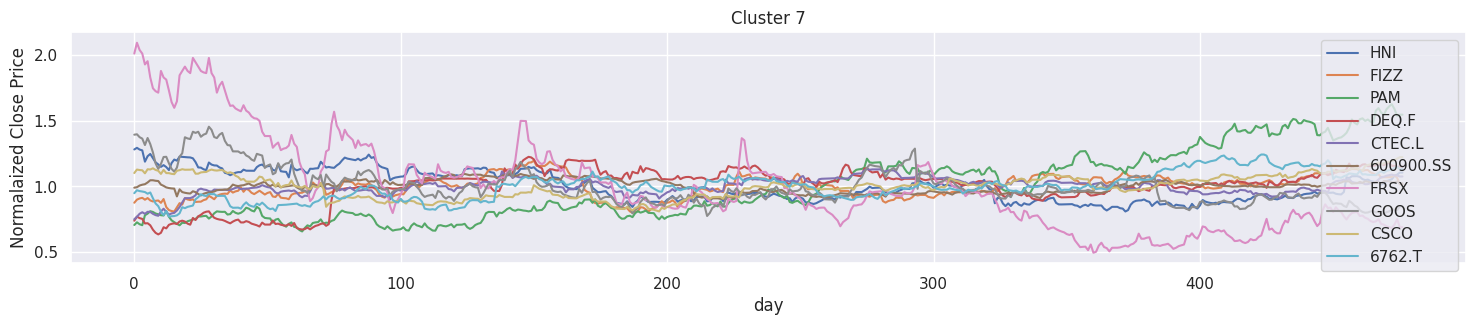

In [ ]:
plot_clusters(final,time_series.columns,time_series)

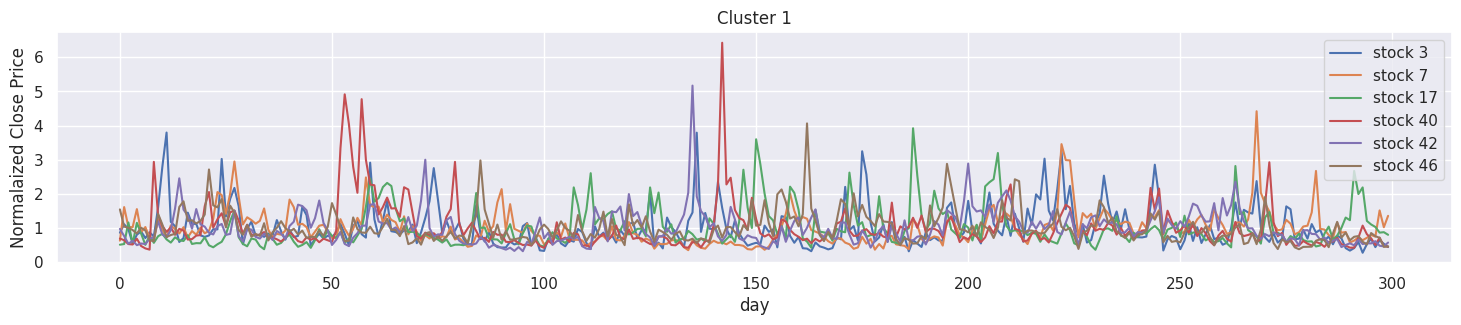

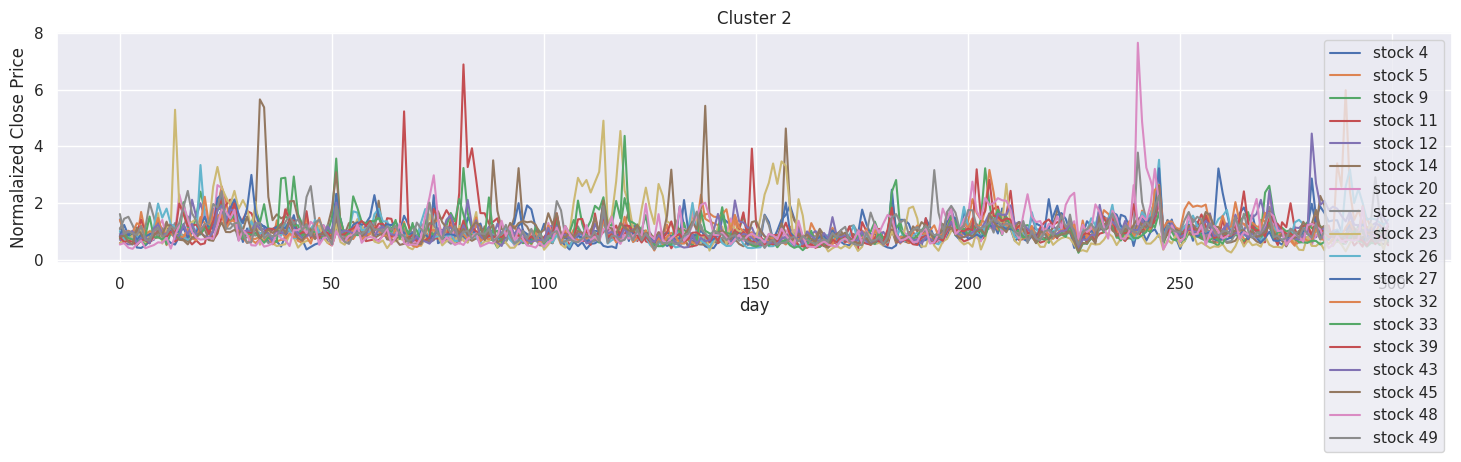

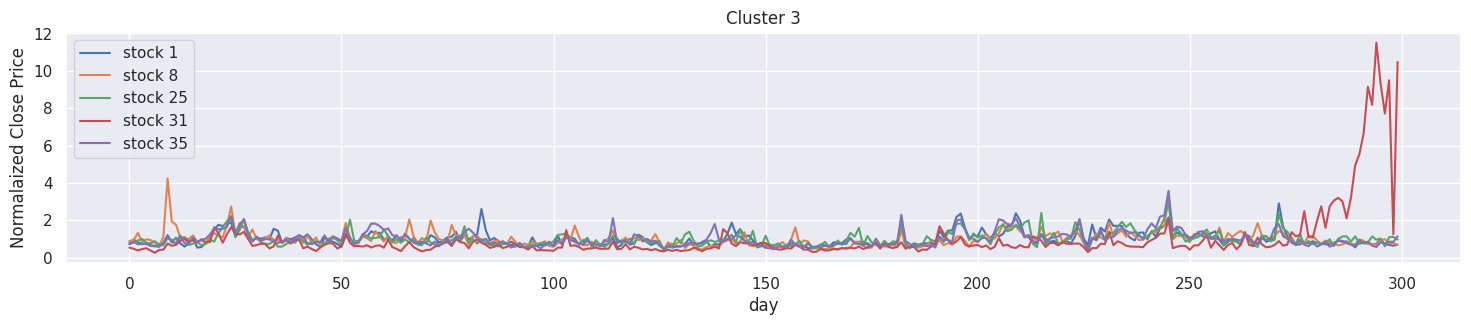

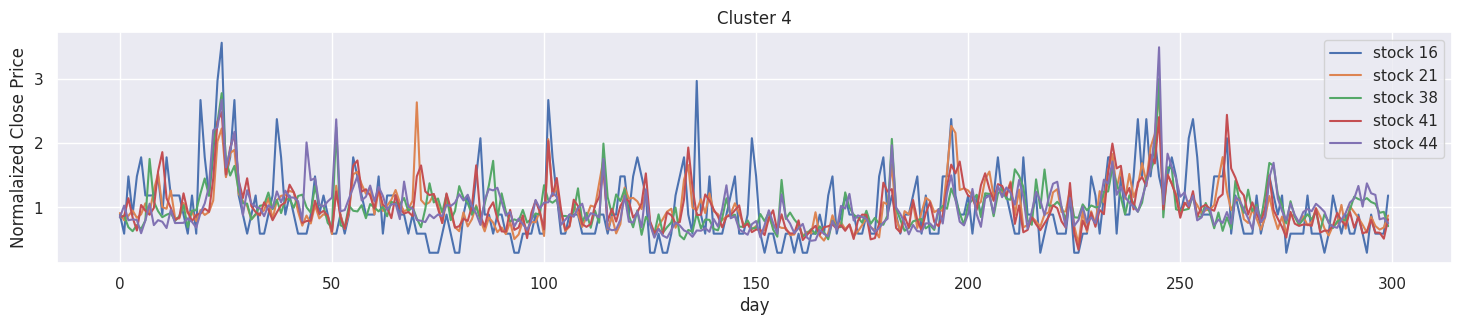

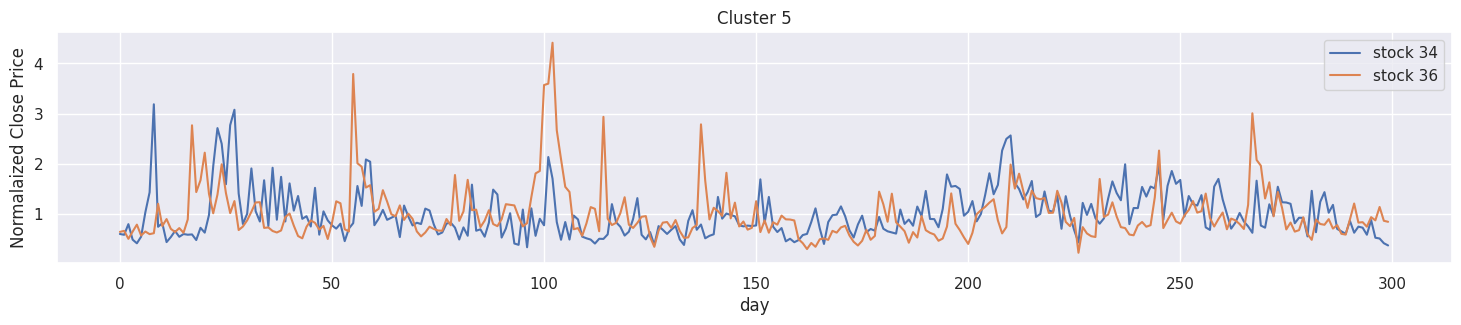

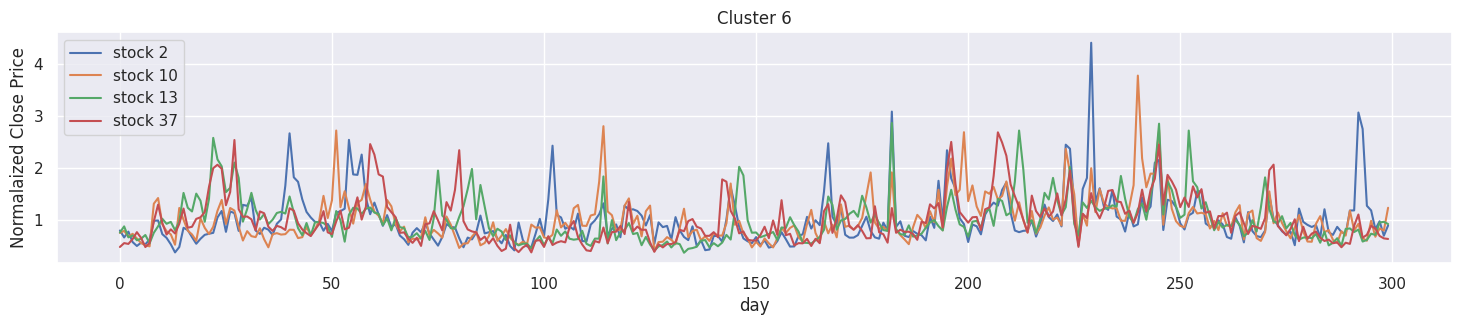

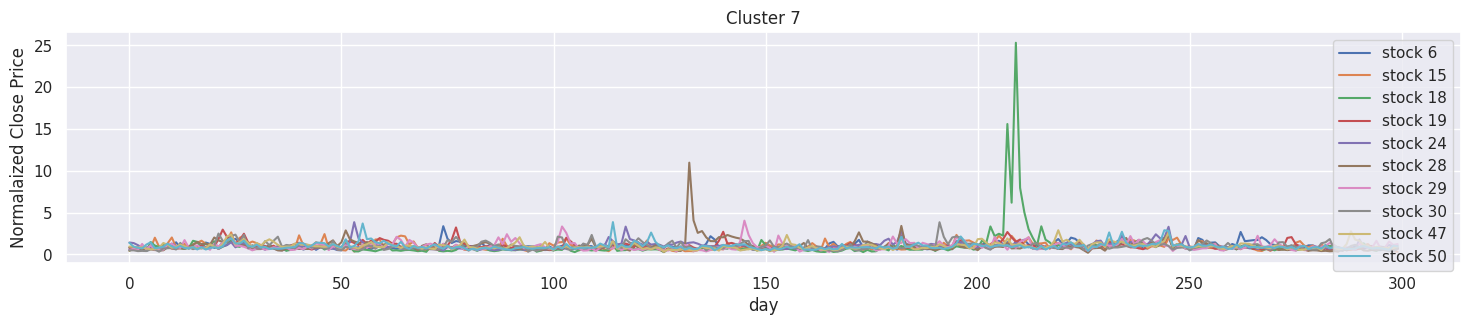

In [ ]:
plot_clusters(final,volume.columns,volume)

In [ ]:
normal = convert_arr_to_cluster(kmeans(features,7))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


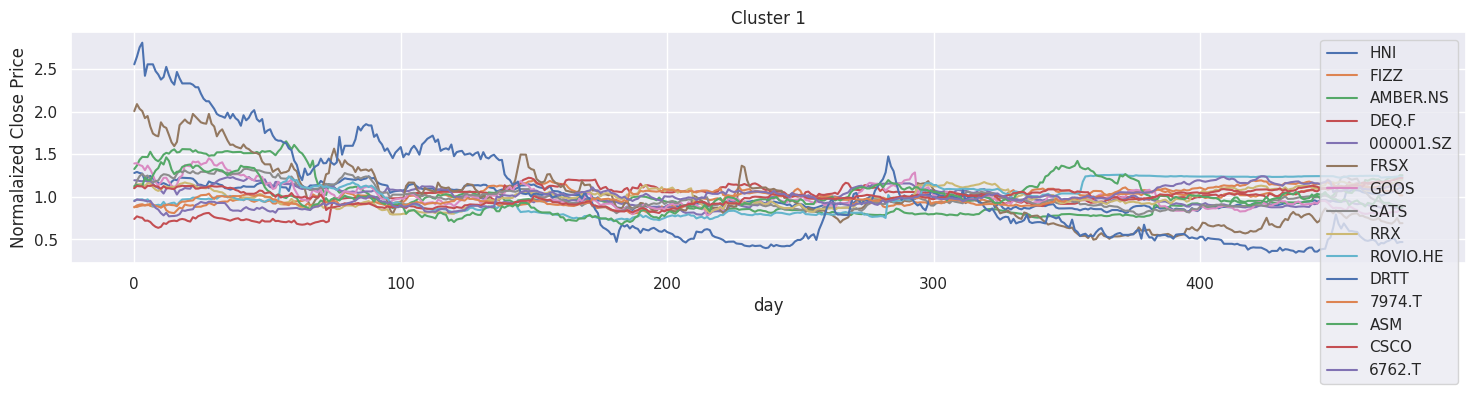

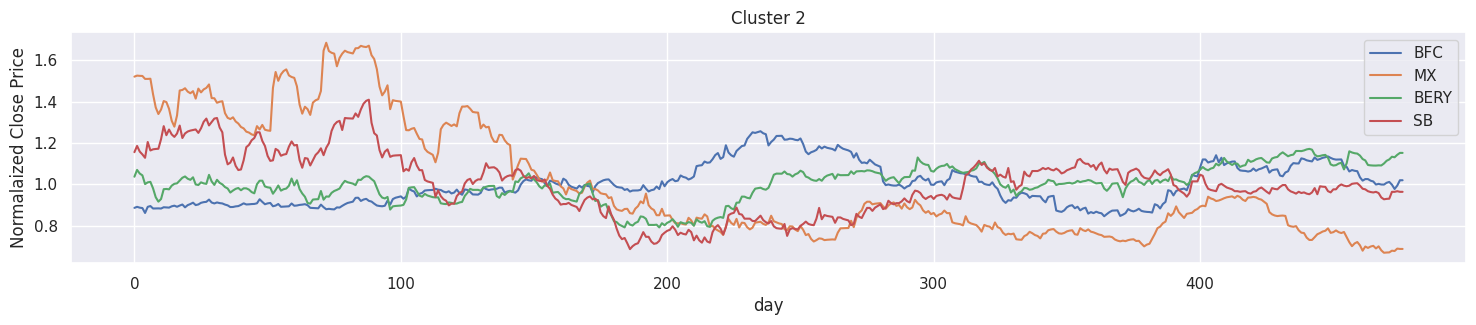

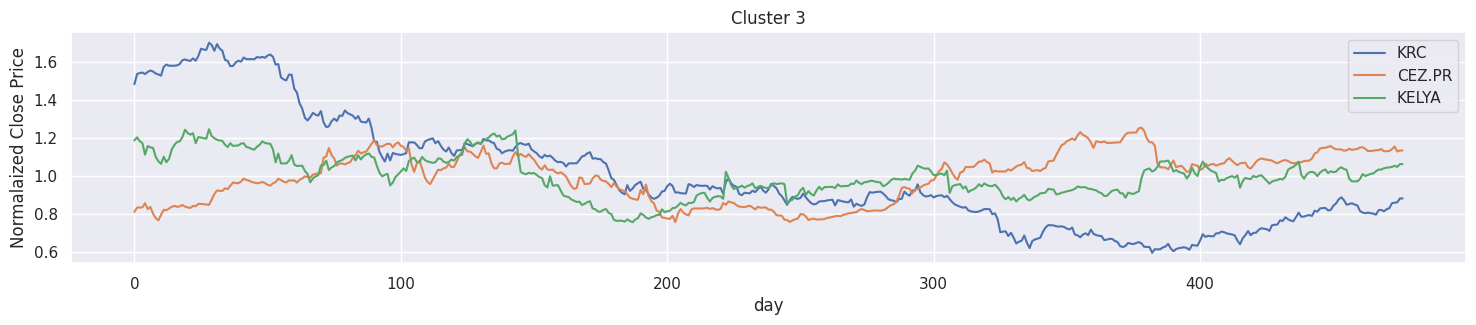

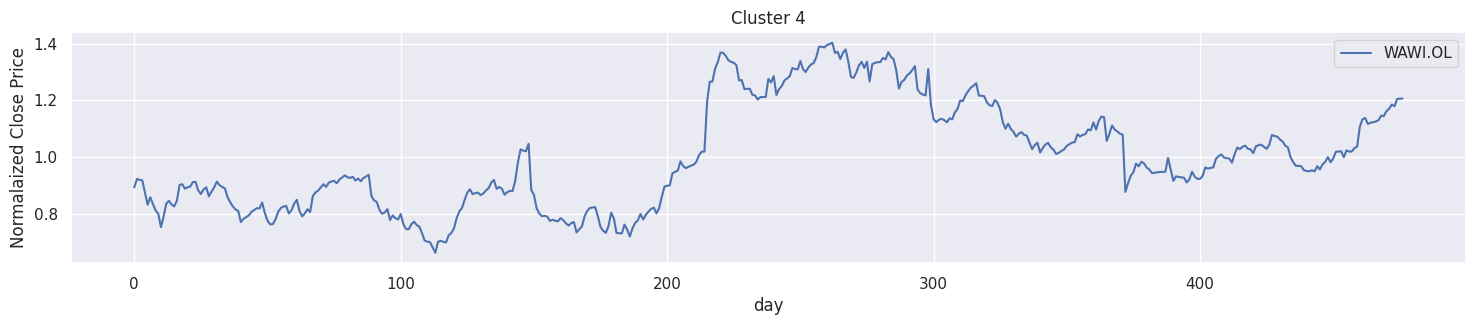

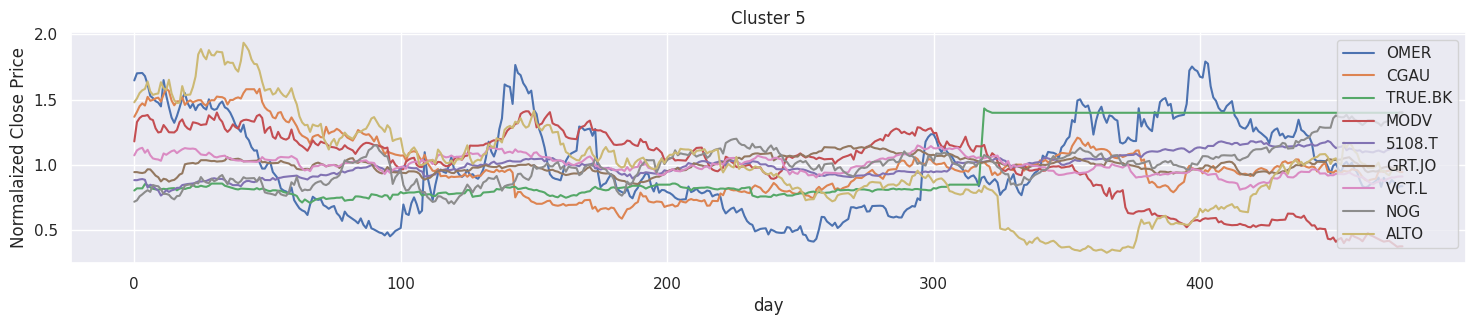

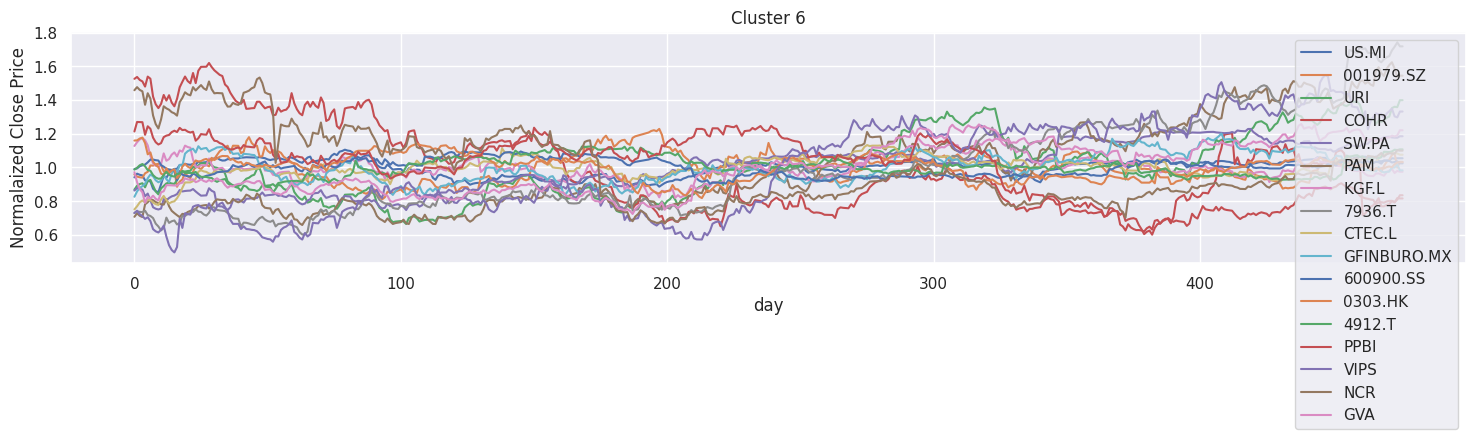

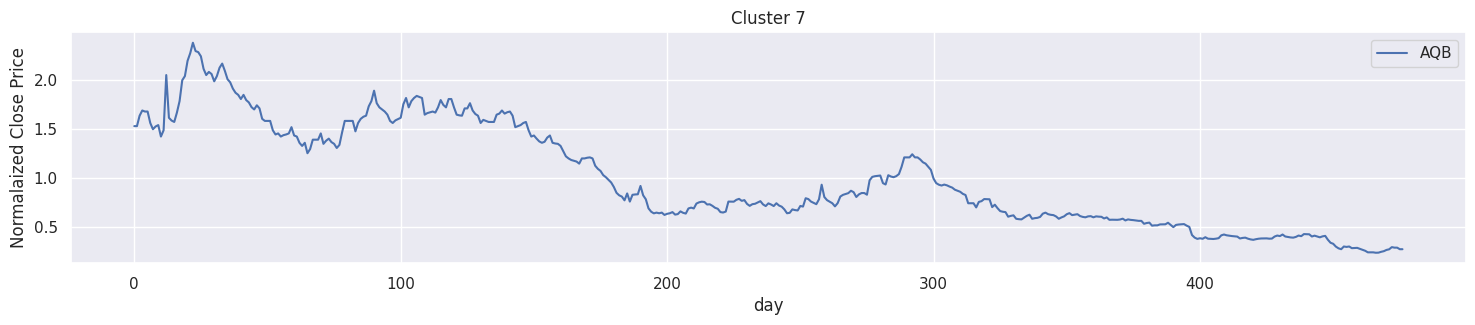

In [ ]:

plot_clusters(noraml,time_series.columns,time_series)

In [ ]:
def pros(stocks):
  df = pd.DataFrame()
  for stock in stocks:
    sel = time_series[stock]
    sel = sel/np.mean(sel)
    df = pd.concat([df,sel],axis=1)

  new_df = df
  new_df = new_df.fillna(new_df.mean())
  shares = new_df.columns.tolist()
  new_df['index'] = list(range(new_df.shape[0]))
  return new_df,shares
def avrage_cluster(cluster):
  df,shares = pros(cluster)
  # print(df)
  df.index = df['index']
  df = df.drop(['index'],axis=1).mean(axis=1)
  # print(df)
  return df
class Trader:
    def __init__(self, assets):
        self.assets = assets
        self.avr = avrage_cluster([asset.name for asset in self.assets])
    def calculate_profit(self,asset, start_time, end_time):
        buy_price = asset.get_price(start_time)
        sell_price = asset.get_price(end_time)
        profit = (sell_price - buy_price)/sell_price
        return profit
    def claculate_loss(self,start_time, end_time):
        avr_profit = (self.avr[start_time] - self.avr[end_time])/self.avr[start_time]
        loss = 0
        for asset in self.assets:
          prof = self.calculate_profit(asset,start_time, end_time)
          loss += (prof - avr_profit)**2
        return loss/len(self.assets)

class Asset:
    def __init__(self, prices):
        self.prices = prices
        self.name = prices.name
    def get_price(self, time):
        return self.prices[time]


In [ ]:
good_traders = [Trader([Asset(time_series[time_series.columns[name]]) for name in cluster]) for cluster in final]
noramal_traders = [Trader([Asset(time_series[time_series.columns[name]]) for name in cluster]) for cluster in normal]

In [ ]:
good_traders[1].assets[0].prices

0      2.083156
1      2.131762
2      2.116717
3      2.109195
4      2.043228
         ...   
472    2.334000
473    2.330000
474    2.334000
475    2.334000
476    2.334000
Name: US.MI, Length: 477, dtype: float64

In [ ]:
tot_loss = 0
for trader in good_traders:
  tot_loss+=trader.claculate_loss(50,250)
tot_loss/len(good_traders)

0.576965450802936

In [ ]:
tot_loss = 0
for trader in noramal_traders:
  tot_loss+=trader.claculate_loss(50,250)
tot_loss/len(noramal_traders)

0.9160833981898735